In [1]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import pandas as pd
import os


In [23]:
import utils.data as dt

# Define training dataset class
class constructImageDataseTrain(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, str(self.dataframe.iloc[idx, 0]) + '.jpg')
        image = Image.open(img_name)
        label = self.dataframe.iloc[idx, 6]
        if self.transform:
            image = self.transform(image)
        return image, label

# Define testing dataset class
class constructImageDataseTest(Dataset):
    def __init__(self, dataframe, img_dir, transform=None):
        self.dataframe = dataframe
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.img_dir, str(self.dataframe.iloc[idx, 0]) + '.jpg')
        image = Image.open(img_name)
        label = self.dataframe.iloc[idx, 0]
        if self.transform:
            image = self.transform(image)
        return image, label

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 调整图像大小
    transforms.ToTensor(),  # 转换为 Tensor
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # 正则化
])

train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3))  # 加入随机擦除
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load training and test data from CSV files
train_df = pd.read_csv('train.csv')  
test_df = pd.read_csv('test.csv')


train_size = int(0.8 * len(train_df))
val_size = len(train_df) - train_size
# randomly sample the training set
train_df_split = train_df.sample(n=train_size, random_state=42)
val_df_split = train_df.drop(train_df_split.index)

train_dataset = constructImageDataseTrain(dataframe=train_df_split, img_dir='train', transform=test_transform)
val_dataset = constructImageDataseTrain(dataframe=val_df_split, img_dir='train', transform=test_transform)
test_dataset = constructImageDataseTest(dataframe=test_df, img_dir='test', transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [7]:
import subprocess
import os

result = subprocess.run('bash -c "source /etc/network_turbo && env | grep proxy"', shell=True, capture_output=True, text=True)
output = result.stdout
for line in output.splitlines():
    if '=' in line:
        var, value = line.split('=', 1)
        os.environ[var] = value

In [9]:
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
import matplotlib.pyplot as plt
import utils.physical_analysis as pa


# Load the image processor
processor = DetrImageProcessor.from_pretrained(
    "facebook/detr-resnet-50",

)

# Load the DETR model
model = DetrForObjectDetection.from_pretrained(
    "facebook/detr-resnet-50", output_attentions=True,cache_dir=save_path
)


model.eval()  


from PIL import Image
image_path = "train/173.jpg"
image = Image.open(image_path)


print(f"Image size (width, height): {image.size}")
print(f"Image mode: {image.mode}")


inputs = processor(images=image, return_tensors="pt")
print("Processed inputs:", inputs)


with torch.no_grad():
    outputs = model(**inputs)

print("Model outputs:", outputs)

# Parse the model outputs to get bounding boxes and labels
target_sizes = torch.tensor([image.size[::-1]])  # (height, width)
print(f"Target sizes (height, width): {target_sizes}")

results = processor.post_process_object_detection(
    outputs, target_sizes=target_sizes, threshold=0.1
)[0]

print(f"Parsed results: {results}")




Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Image size (width, height): (224, 224)
Image mode: RGB
Processed inputs: {'pixel_values': tensor([[[[-1.5185, -1.5185, -1.5185,  ..., -1.5185, -1.5185, -1.5185],
          [-1.5185, -1.5185, -1.5185,  ..., -1.5185, -1.5185, -1.5185],
          [-1.5185, -1.5185, -1.5185,  ..., -1.5185, -1.5185, -1.5185],
          ...,
          [ 1.8550,  1.8550,  1.7694,  ...,  0.5022,  0.6221,  0.6221],
          [ 1.8208,  1.8208,  1.7523,  ...,  0.3481,  0.4679,  0.4679],
          [ 1.8208,  1.8208,  1.7523,  ...,  0.3481,  0.4679,  0.4679]],

         [[-1.1253, -1.1253, -1.1253,  ..., -1.1253, -1.1253, -1.1253],
          [-1.1253, -1.1253, -1.1253,  ..., -1.1253, -1.1253, -1.1253],
          [-1.1253, -1.1253, -1.1253,  ..., -1.1253, -1.1253, -1.1253],
          ...,
          [ 1.4657,  1.4657,  1.3782,  ...,  0.1877,  0.3102,  0.3102],
          [ 1.4307,  1.4307,  1.3606,  ...,  0.0301,  0.1527,  0.1527],
          [ 1.4307,  1.4307,  1.3606,  ...,  0.0301,  0.1527,  0.1527]],

         [[-

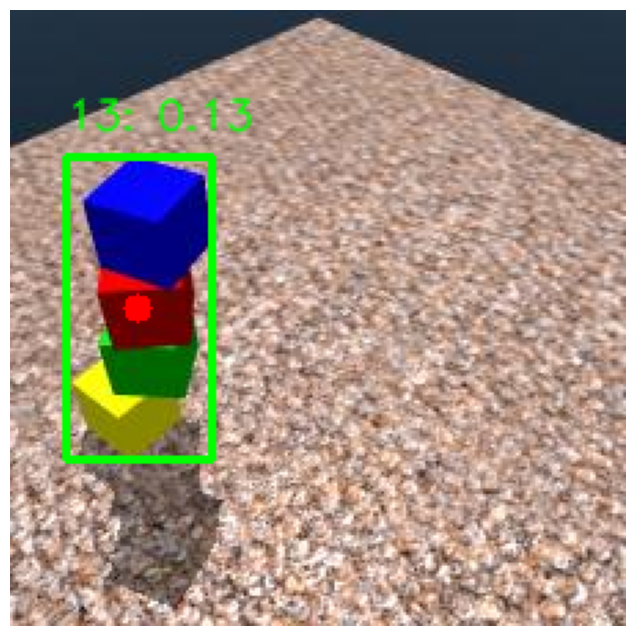

In [10]:
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np

def pil_to_cv2(image):
    
    image = np.array(image)  
    return cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  

boxes = results["boxes"]
# Confidence scores
scores = results["scores"]
# Class labels
labels = results["labels"]  

def visualize_boxes_with_centroids(image, boxes, scores, labels, threshold=0.1):
    
    for i, box in enumerate(boxes):
        if scores[i] < threshold:  
            continue

        x_min, y_min, x_max, y_max = box
        x_min, y_min, x_max, y_max = int(x_min), int(y_min), int(x_max), int(y_max)

        # Calculate the centroid
        cx = (x_min + x_max) // 2
        cy = (y_min + y_max) // 2

        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        cv2.circle(image, (cx, cy), 5, (0, 0, 255), -1)  

        label_text = f"{labels[i]}: {scores[i]:.2f}"
        cv2.putText(image, label_text, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, (0, 255, 0), 1, cv2.LINE_AA)

    
    plt.figure(figsize=(8, 8))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
image_cv2 = pil_to_cv2(image) 

visualize_boxes_with_centroids(image_cv2, results["boxes"], results["scores"], results["labels"])


In [11]:
outputs.last_hidden_state.shape


torch.Size([1, 100, 256])

In [12]:
import torch
import torch.nn as nn  
import utils.model_helper as model_helper

model_helper.check_tranformer_worked()


In [14]:

import utils.model_helper as ml
import importlib
importlib.reload(ml)
# Initialize transformer module 
custom_transformer = ml.CustomTransformerModule(
    hidden_dim=256, num_heads=8, num_layers=6, num_classes=6
)

# Pass the hidden state from DETR's decoder to the custom transformer module
last_hidden_state = outputs.last_hidden_state  # (batch_size, num_queries, hidden_dim)
predictions = custom_transformer(last_hidden_state)

# Print the final output probabilities
print("Predicted probabilities:", predictions)

predicted_class = torch.argmax(predictions, dim=1) + 1  

print("Predicted class (1-6):", predicted_class.item())

/root/miniconda3/lib/python3.12/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Predicted probabilities: tensor([[-0.5051, -0.7547, -0.4977,  0.1781,  1.1601,  1.2402]],
       grad_fn=<AddmmBackward0>)
Predicted class (1-6): 6


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from transformers import DetrImageProcessor, DetrForObjectDetection
from tqdm import tqdm
from PIL import Image
import torch.nn.functional as F
from tqdm import tqdm
import torch
import torch.nn.functional as F
# Loading DETR model and image processing
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
detr_model = DetrForObjectDetection.from_pretrained(
    "facebook/detr-resnet-50", output_attentions=True
)
detr_model.eval()  


class CustomTransformerModule(nn.Module):
    def __init__(self, hidden_dim=256, num_heads=8, num_layers=6, num_classes=6):
        super(CustomTransformerModule, self).__init__()
        self.transformer = nn.Transformer(
            d_model=hidden_dim,
            nhead=num_heads,
            num_encoder_layers=num_layers,
            num_decoder_layers=num_layers,
        )
        self.fc = nn.Linear(hidden_dim, num_classes)  # output results

    def forward(self, x):
        x = x.permute(1, 0, 2)  # (batch_size, seq_len, hidden_dim) -> (seq_len, batch_size, hidden_dim)
        x = self.transformer(x, x)  # pass Transformer
        x = x.mean(dim=0) 
        out = self.fc(x)  
        return out


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
detr_model.to(device)
custom_transformer = CustomTransformerModule().to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(custom_transformer.parameters(), lr=1e-4)


log_data = {
    "train_loss": [],
    "val_loss": [],
    "train_acc": [],
    "val_acc": [],
    "train_approx_acc": [],
    "val_approx_acc": []
}

# training
def train(model, detr_model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    correct = 0
    approx_correct = 0  
    total = 0
    batch_count = 0  

    for images, labels in tqdm(train_loader):
        print("11111" + str(torch.unique(labels)))  # check unique results


        images, labels = images.to(device), labels.to(device)


        with torch.no_grad():  
            inputs = processor(images=list(images), return_tensors="pt", padding=True).to(device)
            outputs = detr_model(**inputs)
            last_hidden_state = outputs.last_hidden_state  # (batch_size, num_queries, hidden_dim)


        logits = model(last_hidden_state)  # (batch_size, num_classes)

        # Print predicted classes
        if batch_count % 30 == 0:
            predictions = torch.argmax(logits, dim=1) + 1  # 将预测类别映射回 1-6
            # print(f"Batch {batch_count}: Predicted classes: {predictions.tolist()}")
        # calculate loss
        loss = criterion(logits, labels - 1)  # 标签减 1，确保符合 CrossEntropyLoss 要求

        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        
        total_loss += loss.item()
        correct += (predictions == labels).sum().item()
        approx_correct += ((predictions - labels).abs() <= 1).sum().item()
        total += labels.size(0)

    
    avg_loss = total_loss / len(train_loader)
    accuracy = correct / total * 100
    approx_accuracy = approx_correct / total * 100

    print(f"Training Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%, Approx Accuracy: {approx_accuracy:.2f}%")

    return avg_loss, accuracy, approx_accuracy

# validating
def validate(model, detr_model, val_loader, criterion, device):
    print("Validating...")
    model.eval()
    total_loss = 0
    correct = 0
    approx_correct = 0  
    total = 0

    with torch.no_grad():
        for images, labels in tqdm(val_loader):
            images, labels = images.to(device), labels.to(device)

            # Use DETR model to extract candidate box features
            inputs = processor(images=list(images), return_tensors="pt", padding=True).to(device)
            outputs = detr_model(**inputs)
            last_hidden_state = outputs.last_hidden_state

            # Use the Transformer model for classification
            logits = model(last_hidden_state)

            # Convert logits to probability distribution and compute predictions
            predictions = torch.argmax(F.softmax(logits, dim=1), dim=1) + 1

          
            loss = criterion(logits, labels - 1)  
            total_loss += loss.item()

            
            correct += (predictions == labels).sum().item()
            approx_correct += ((predictions - labels).abs() <= 1).sum().item()
            total += labels.size(0)

    
    avg_loss = total_loss / len(val_loader)
    accuracy = correct / total * 100
    approx_accuracy = approx_correct / total * 100

    print(f"Validation Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%, Approx Accuracy: {approx_accuracy:.2f}%")

    return avg_loss, accuracy, approx_accuracy

# train model
num_epochs = 18
for epoch in range(num_epochs):
    print(f"Epoch [{epoch+1}/{num_epochs}]")

    
    train_loss, train_acc, train_approx_acc = train(
        custom_transformer, detr_model, train_loader, optimizer, criterion, device
    )

    
    val_loss, val_acc, val_approx_acc = validate(
        custom_transformer, detr_model, val_loader, criterion, device
    )

    
    log_data["train_loss"].append(train_loss)
    log_data["val_loss"].append(val_loss)
    log_data["train_acc"].append(train_acc)
    log_data["val_acc"].append(val_acc)
    log_data["train_approx_acc"].append(train_approx_acc)
    log_data["val_approx_acc"].append(val_approx_acc)

    print(f"Epoch {epoch+1} complete. Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

# print training and validating log
print("\nTraining and Validation Log:")
for key, values in log_data.items():
    print(f"{key}: {values}")

#26 s

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/root/miniconda3/lib/python3.12/site-packages/torch/nn/modules/transformer.py:306: U

Epoch [1/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:43,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:30,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:27,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:29,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:29,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:34,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:25,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:20,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:16,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:13,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:11,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<06:09,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:26<06:08,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:28<06:08,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:31<06:06,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:33<06:02,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:35<05:57,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:37<05:55,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:39<05:53,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:41<05:52,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:43<05:51,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:45<05:57,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:47<05:55,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:49<05:51,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:52<06:00,  2.16s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:54<05:53,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:56<05:45,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:58<05:43,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [01:00<05:40,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:02<05:35,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:04<05:36,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:06<05:36,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:08<05:31,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:10<05:29,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:12<05:23,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:14<05:21,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:16<05:21,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:18<05:19,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:20<05:17,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:23<05:14,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:25<05:12,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:27<05:12,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:29<05:09,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:31<05:07,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:33<05:05,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:35<05:00,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:37<04:58,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:39<04:55,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:41<04:57,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:43<04:53,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:45<04:52,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:47<04:52,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:50<04:49,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:52<04:48,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:54<04:44,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:56<04:42,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:58<04:38,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [02:00<04:34,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [02:02<04:30,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:04<04:30,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:06<04:26,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:08<04:25,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:10<04:22,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:12<04:20,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:14<04:17,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:16<04:15,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:18<04:13,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:20<04:11,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:22<04:11,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:24<04:12,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:26<04:09,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:28<04:08,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:30<04:04,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:32<04:02,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:35<03:59,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:37<03:57,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:39<03:56,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:41<03:54,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:43<03:53,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:45<03:52,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:47<03:49,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:49<03:46,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:51<03:42,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:53<03:43,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:55<03:42,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:57<03:41,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:59<03:38,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [03:02<03:38,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [03:04<03:35,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:06<03:34,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:08<03:30,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:10<03:28,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:12<03:26,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:14<03:21,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:16<03:19,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:18<03:16,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:20<03:13,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:22<03:12,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:24<03:11,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:26<03:08,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:28<03:06,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:30<03:04,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:32<03:00,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:34<02:59,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:36<02:58,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:39<02:57,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:41<02:55,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:43<02:53,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:45<02:52,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:47<02:50,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:49<02:47,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:51<02:45,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:53<02:42,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:55<02:40,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:57<02:38,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:59<02:36,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [04:01<02:35,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [04:03<02:33,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [04:05<02:31,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:08<02:29,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:10<02:26,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:12<02:23,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:14<02:21,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:16<02:18,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:18<02:16,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:20<02:15,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:22<02:14,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:24<02:13,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:26<02:10,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:28<02:07,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:30<02:04,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:32<02:02,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:34<02:00,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:36<01:59,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:38<01:57,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:40<01:55,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:42<01:54,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:45<01:51,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:47<01:49,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:49<01:47,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:51<01:44,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:53<01:42,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:55<01:40,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:57<01:38,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:59<01:37,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [05:01<01:34,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [05:03<01:33,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [05:05<01:30,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [05:07<01:29,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:09<01:26,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:11<01:23,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:13<01:22,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:15<01:20,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:17<01:18,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:20<01:18,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:22<01:15,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:24<01:13,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:26<01:11,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:28<01:09,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:30<01:07,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:32<01:04,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:34<01:02,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:36<01:00,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:39<00:58,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:41<00:56,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:43<00:54,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:45<00:51,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:47<00:49,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:49<00:47,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:51<00:45,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:53<00:43,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:55<00:41,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:57<00:39,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:59<00:37,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [06:01<00:35,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [06:03<00:33,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [06:05<00:31,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [06:08<00:29,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [06:10<00:26,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:12<00:24,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:14<00:22,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:16<00:20,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:18<00:18,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:20<00:16,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:22<00:14,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:24<00:12,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:26<00:10,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:28<00:08,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:30<00:06,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:32<00:04,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:34<00:02,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:36<00:00,  2.07s/it]


Training Loss: 1.7130, Accuracy: 23.52%, Approx Accuracy: 60.03%
Validating...


100%|██████████| 48/48 [01:38<00:00,  2.05s/it]


Validation Loss: 1.7116, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 1 complete. Train Loss: 1.7130, Val Loss: 1.7116
Epoch [2/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:41,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:34,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:28,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:25,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:22,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:21,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:18,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:18,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:19,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:15,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:13,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<06:13,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:26<06:11,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:28<06:11,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:31<06:08,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:33<06:04,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:35<05:59,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:37<05:59,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:39<05:54,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:41<06:02,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:43<05:58,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:45<05:53,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:47<05:49,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:49<05:45,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:51<05:40,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:53<05:38,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:55<05:37,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:57<05:38,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [00:59<05:37,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:01<05:35,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:04<05:31,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:06<05:31,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:08<05:29,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:10<05:26,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:12<05:23,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:14<05:20,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:16<05:23,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:18<05:26,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:20<05:20,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:22<05:18,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:24<05:14,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:26<05:11,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:29<05:12,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:31<05:07,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:33<05:04,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:35<05:02,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:37<05:10,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:39<05:04,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:41<05:00,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:43<04:55,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:45<04:51,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:47<04:47,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:49<04:43,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:51<04:42,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:53<04:40,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:56<04:42,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:58<04:39,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [02:00<04:35,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [02:02<04:31,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:04<04:29,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:06<04:27,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:08<04:23,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:10<04:20,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:12<04:18,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:14<04:18,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:16<04:17,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:18<04:15,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:20<04:13,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:22<04:10,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:24<04:08,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:26<04:05,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:28<04:05,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:30<04:02,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:32<04:02,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:34<04:06,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:37<04:04,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:39<03:59,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:41<03:56,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:43<03:53,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:45<03:50,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:47<03:48,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:49<03:46,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:51<03:43,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:53<03:42,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:55<03:40,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:57<03:37,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:59<03:35,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [03:01<03:33,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [03:03<03:31,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:05<03:28,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:07<03:25,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:09<03:23,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:11<03:22,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:14<03:23,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:16<03:22,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:18<03:19,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:20<03:16,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:22<03:17,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:24<03:14,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:26<03:10,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:28<03:07,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:30<03:06,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:32<03:05,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:34<03:03,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:36<03:00,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:38<02:59,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:41<02:57,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:43<02:54,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:45<02:50,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:47<02:52,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:49<02:49,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:51<02:47,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:53<02:45,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:55<02:42,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:57<02:39,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:59<02:37,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [04:01<02:33,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [04:03<02:31,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [04:05<02:29,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:07<02:27,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:09<02:25,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:12<02:24,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:14<02:22,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:16<02:19,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:18<02:16,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:20<02:13,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:22<02:12,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:24<02:10,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:26<02:08,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:28<02:06,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:30<02:05,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:32<02:03,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:34<02:01,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:36<01:59,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:38<01:57,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:40<01:55,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:42<01:52,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:44<01:50,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:46<01:48,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:48<01:47,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:51<01:45,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:53<01:43,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:55<01:41,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:57<01:39,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:59<01:36,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [05:01<01:34,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [05:03<01:32,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [05:05<01:30,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [05:07<01:27,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:09<01:26,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:11<01:24,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:13<01:22,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:15<01:20,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:17<01:18,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:19<01:16,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:21<01:14,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:23<01:12,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:26<01:09,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:28<01:08,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:30<01:06,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:32<01:04,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:34<01:01,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:36<00:59,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:38<00:57,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:40<00:55,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:42<00:53,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:44<00:51,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:46<00:49,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:48<00:47,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:50<00:45,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:52<00:43,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:54<00:41,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:56<00:38,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:58<00:36,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [06:00<00:34,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [06:02<00:32,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [06:04<00:30,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [06:07<00:28,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [06:09<00:26,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:11<00:24,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:13<00:22,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:15<00:20,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:17<00:18,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:19<00:16,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:21<00:14,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:23<00:12,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:25<00:10,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:27<00:08,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:29<00:06,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:31<00:04,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:33<00:02,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:35<00:00,  2.06s/it]


Training Loss: 1.6973, Accuracy: 23.70%, Approx Accuracy: 60.94%
Validating...


100%|██████████| 48/48 [01:38<00:00,  2.05s/it]


Validation Loss: 1.7084, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 2 complete. Train Loss: 1.6973, Val Loss: 1.7084
Epoch [3/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:29,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:27,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:27,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:26,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:27,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:28,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:22,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:18,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:16,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:14,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:13,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<06:12,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:26<06:08,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:28<06:09,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:30<06:03,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:32<06:01,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:35<06:00,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:37<05:56,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:39<05:58,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:41<05:56,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:43<05:54,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:45<05:50,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:47<05:51,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:49<05:50,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:51<05:45,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:53<05:41,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:55<05:39,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:57<05:36,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [00:59<05:34,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:01<05:32,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:03<05:30,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:05<05:29,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:08<05:29,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:10<05:28,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:12<05:23,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:14<05:21,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:16<05:21,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:18<05:17,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:20<05:15,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:22<05:12,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:24<05:08,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:26<05:09,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:28<05:05,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:30<05:03,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:32<05:03,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:34<05:01,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:36<04:59,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:38<04:57,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:41<04:54,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:43<04:53,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:45<04:51,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:47<04:51,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:49<04:50,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:51<04:45,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:53<04:42,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:55<04:40,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:57<04:37,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [01:59<04:34,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [02:01<04:33,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:03<04:31,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:05<04:31,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:07<04:29,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:09<04:26,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:12<04:25,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:14<04:25,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:16<04:21,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:18<04:18,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:20<04:15,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:22<04:22,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:24<04:22,  2.15s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:26<04:18,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:29<04:14,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:31<04:08,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:33<04:04,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:35<04:00,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:37<03:57,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:39<03:55,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:41<03:53,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:43<03:51,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:45<03:51,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:47<03:50,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:49<03:46,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:51<03:44,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:53<03:42,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:55<03:39,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:57<03:38,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:59<03:36,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [03:01<03:33,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [03:03<03:33,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:05<03:30,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:08<03:26,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:10<03:24,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:12<03:23,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:14<03:21,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:16<03:18,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:18<03:18,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:20<03:15,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:22<03:15,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:24<03:19,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:26<03:14,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:28<03:10,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:30<03:07,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:32<03:04,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:35<03:02,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:37<02:59,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:39<02:57,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:41<02:55,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:43<02:54,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:45<02:51,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:47<02:48,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:49<02:44,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:51<02:42,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:53<02:39,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:55<02:38,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:57<02:36,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:59<02:36,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [04:01<02:36,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [04:03<02:33,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [04:05<02:30,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:07<02:28,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:09<02:26,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:12<02:24,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:14<02:21,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:16<02:20,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:18<02:18,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:20<02:16,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:22<02:15,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:24<02:12,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:26<02:09,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:28<02:07,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:30<02:05,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:32<02:03,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:34<02:00,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:36<01:58,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:38<01:56,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:40<01:55,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:42<01:53,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:45<01:52,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:47<01:49,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:49<01:46,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:51<01:44,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:53<01:42,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:55<01:40,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:57<01:37,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:59<01:35,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [05:01<01:34,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [05:03<01:32,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [05:05<01:29,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [05:07<01:27,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:09<01:25,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:11<01:23,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:13<01:21,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:15<01:19,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:17<01:17,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:19<01:16,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:21<01:14,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:23<01:12,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:25<01:09,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:28<01:08,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:30<01:06,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:32<01:03,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:34<01:01,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:36<00:59,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:38<00:57,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:40<00:55,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:42<00:53,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:44<00:51,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:46<00:49,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:48<00:47,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:50<00:45,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:52<00:42,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:54<00:40,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:56<00:38,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:58<00:36,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [06:00<00:34,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [06:02<00:32,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [06:05<00:30,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [06:07<00:28,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [06:09<00:26,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:11<00:24,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:13<00:22,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:15<00:20,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:17<00:18,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:19<00:16,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:21<00:14,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:23<00:12,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:25<00:10,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:27<00:08,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:29<00:06,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:31<00:04,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:33<00:02,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:36<00:00,  2.06s/it]


Training Loss: 1.6933, Accuracy: 24.14%, Approx Accuracy: 60.71%
Validating...


100%|██████████| 48/48 [01:38<00:00,  2.06s/it]


Validation Loss: 1.7065, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 3 complete. Train Loss: 1.6933, Val Loss: 1.7065
Epoch [4/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:31,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:32,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:29,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:28,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:25,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:19,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:19,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:18,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:19,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:17,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:15,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<06:11,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:26<06:07,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:28<06:05,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:30<06:02,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:32<05:58,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:34<05:55,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:36<05:56,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:39<05:54,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:41<05:56,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:43<05:54,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:45<05:51,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:47<05:48,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:49<05:43,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:51<05:38,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:53<05:38,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:55<05:36,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:57<05:37,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [00:59<05:34,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:01<05:32,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:03<05:32,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:05<05:29,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:07<05:26,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:09<05:26,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:11<05:21,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:13<05:19,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:16<05:19,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:18<05:19,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:20<05:16,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:22<05:15,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:24<05:12,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:26<05:09,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:28<05:06,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:30<05:03,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:32<05:05,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:34<05:02,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:36<05:00,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:38<04:57,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:41<05:02,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:43<04:57,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:45<04:51,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:47<04:49,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:49<04:45,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:51<04:41,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:53<04:39,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:55<04:39,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:57<04:37,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [01:59<04:36,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [02:01<04:33,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:03<04:30,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:05<04:28,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:07<04:25,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:09<04:24,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:11<04:21,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:13<04:20,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:16<04:25,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:18<04:21,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:20<04:16,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:22<04:14,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:24<04:11,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:26<04:09,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:28<04:05,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:30<04:01,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:32<03:59,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:34<04:00,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:36<03:58,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:38<03:56,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:40<03:53,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:42<03:52,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:44<03:49,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:46<03:46,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:48<03:45,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:50<03:43,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:52<03:44,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:55<03:41,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:57<03:39,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:59<03:36,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [03:01<03:33,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [03:03<03:31,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:05<03:28,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:07<03:26,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:09<03:23,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:11<03:20,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:13<03:20,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:15<03:18,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:17<03:17,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:19<03:13,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:21<03:13,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:23<03:10,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:25<03:09,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:27<03:06,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:29<03:02,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:31<03:03,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:33<03:00,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:35<02:58,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:38<02:56,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:40<02:53,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:42<02:50,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:44<02:48,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:46<02:46,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:48<02:44,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:50<02:41,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:52<02:39,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:54<02:38,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:56<02:41,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:58<02:37,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [04:00<02:34,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [04:02<02:31,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [04:04<02:29,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:06<02:26,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:08<02:24,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:10<02:23,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:12<02:22,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:14<02:19,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:16<02:17,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:18<02:15,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:20<02:12,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:22<02:11,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:25<02:11,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:27<02:08,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:29<02:05,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:31<02:03,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:33<02:01,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:35<01:59,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:37<01:57,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:39<01:54,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:41<01:52,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:43<01:50,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:45<01:49,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:47<01:46,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:49<01:45,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:51<01:42,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:53<01:40,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:55<01:38,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:57<01:36,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [05:00<01:34,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [05:02<01:31,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [05:04<01:30,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [05:06<01:27,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:08<01:25,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:10<01:23,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:12<01:22,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:14<01:20,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:16<01:18,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:18<01:16,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:20<01:13,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:22<01:12,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:24<01:09,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:26<01:07,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:28<01:05,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:30<01:03,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:32<01:01,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:34<00:59,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:36<00:57,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:38<00:55,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:41<00:53,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:43<00:51,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:45<00:49,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:47<00:47,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:49<00:44,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:51<00:43,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:53<00:40,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:55<00:38,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:57<00:36,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [05:59<00:35,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [06:01<00:32,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [06:03<00:30,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [06:05<00:28,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [06:07<00:26,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:09<00:24,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:11<00:22,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:13<00:20,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:15<00:18,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:17<00:16,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:19<00:14,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:21<00:12,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:23<00:10,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:25<00:08,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:28<00:06,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:30<00:04,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:32<00:02,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:34<00:00,  2.05s/it]


Training Loss: 1.6917, Accuracy: 23.93%, Approx Accuracy: 60.68%
Validating...


100%|██████████| 48/48 [01:39<00:00,  2.07s/it]


Validation Loss: 1.7049, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 4 complete. Train Loss: 1.6917, Val Loss: 1.7049
Epoch [5/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:34,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:36,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:38,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:40,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:37,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:36,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:31,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:27,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:19<06:26,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:21<06:23,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:23<06:21,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:25<06:20,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:27<06:17,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:29<06:14,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:31<06:11,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:33<06:09,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:35<06:06,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:37<06:07,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:40<06:04,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:42<05:59,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:44<05:56,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:46<06:06,  2.16s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:48<06:03,  2.15s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:50<06:02,  2.16s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:52<05:56,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:55<05:53,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:57<05:48,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:59<05:43,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [01:01<05:40,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:03<05:38,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:05<05:35,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:07<05:35,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:09<05:33,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:11<05:30,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:13<05:27,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:15<05:25,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:17<05:21,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:20<05:21,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:22<05:18,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:24<05:16,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:26<05:17,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:28<05:26,  2.18s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:30<05:21,  2.16s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:32<05:14,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:34<05:09,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:37<05:18,  2.18s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:39<05:13,  2.16s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:41<05:07,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:43<05:02,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:45<05:01,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:47<04:59,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:50<05:04,  2.17s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:52<05:00,  2.16s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:54<04:54,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:56<04:49,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:58<04:45,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [02:00<04:42,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [02:02<04:40,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [02:04<04:38,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:06<04:36,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:08<04:33,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:10<04:30,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:12<04:26,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:14<04:23,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:17<04:22,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:19<04:21,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:21<04:20,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:23<04:19,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:25<04:18,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:27<04:16,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:29<04:14,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:31<04:11,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:33<04:09,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:35<04:07,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:38<04:05,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:40<04:03,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:42<04:01,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:44<03:59,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:46<03:57,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:48<03:58,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:50<03:53,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:52<03:52,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:54<03:48,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:56<03:45,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:59<03:41,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [03:01<03:39,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [03:03<03:38,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [03:05<03:37,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [03:07<03:35,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:09<03:32,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:11<03:29,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:13<03:28,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:15<03:26,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:17<03:25,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:19<03:23,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:22<03:21,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:24<03:24,  2.15s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:26<03:21,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:28<03:16,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:30<03:13,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:32<03:09,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:34<03:07,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:36<03:05,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:38<03:04,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:40<03:01,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:43<03:01,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:45<02:58,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:47<02:55,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:49<02:51,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:51<02:49,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:53<02:47,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:55<02:46,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:57<02:45,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:59<02:43,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [04:01<02:42,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [04:03<02:39,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [04:06<02:38,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [04:08<02:37,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [04:10<02:33,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:12<02:31,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:14<02:28,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:16<02:26,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:18<02:24,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:20<02:22,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:22<02:20,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:24<02:18,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:27<02:16,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:29<02:13,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:31<02:10,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:33<02:07,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:35<02:05,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:37<02:04,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:39<02:03,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:41<02:01,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:43<01:59,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:45<01:58,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:47<01:56,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:50<01:53,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:52<01:51,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:54<01:49,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:56<01:47,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:58<01:45,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [05:00<01:43,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [05:02<01:41,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [05:04<01:38,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [05:06<01:36,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [05:08<01:34,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [05:11<01:32,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [05:13<01:29,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:15<01:27,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:17<01:24,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:19<01:24,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:21<01:23,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:23<01:20,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:25<01:18,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:27<01:16,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:30<01:14,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:32<01:12,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:34<01:10,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:36<01:07,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:38<01:05,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:40<01:03,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:42<01:01,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:44<00:59,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:46<00:56,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:49<00:54,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:51<00:52,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:53<00:50,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:55<00:48,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:57<00:46,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:59<00:45,  2.18s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [06:02<00:42,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [06:04<00:40,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [06:06<00:37,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [06:08<00:35,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [06:10<00:33,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [06:12<00:31,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [06:14<00:29,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [06:16<00:27,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:18<00:25,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:20<00:23,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:23<00:21,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:25<00:18,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:27<00:16,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:29<00:14,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:31<00:12,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:33<00:10,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:35<00:08,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:37<00:06,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:39<00:04,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:41<00:02,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:43<00:00,  2.10s/it]


Training Loss: 1.6906, Accuracy: 24.14%, Approx Accuracy: 60.79%
Validating...


100%|██████████| 48/48 [01:40<00:00,  2.09s/it]


Validation Loss: 1.7024, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 5 complete. Train Loss: 1.6906, Val Loss: 1.7024
Epoch [6/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:36,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:39,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:31,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:34,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:32,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:32,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:29,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:27,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:24,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:22,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:23<06:31,  2.16s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:25<06:25,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:27<06:25,  2.15s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:29<06:26,  2.17s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:32<06:26,  2.18s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:34<06:18,  2.15s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:36<06:20,  2.18s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:38<06:12,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:40<06:10,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:42<06:06,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:44<06:02,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:46<06:01,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:48<05:59,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:51<06:06,  2.18s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:53<06:05,  2.19s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:55<05:59,  2.17s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:57<05:53,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:59<05:49,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [01:02<05:52,  2.16s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:04<05:46,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:06<05:42,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:08<05:39,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:10<05:36,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:12<05:36,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:14<05:32,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:16<05:29,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:18<05:28,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:20<05:22,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:22<05:17,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:25<05:14,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:27<05:12,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:29<05:11,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:31<05:10,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:33<05:08,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:35<05:06,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:37<05:04,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:39<05:00,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:41<04:59,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:43<04:56,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:45<04:56,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:47<04:53,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:50<04:53,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:52<04:50,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:54<04:48,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:56<04:45,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:58<04:42,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [02:00<04:41,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [02:02<04:36,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [02:04<04:35,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:06<04:32,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:08<04:31,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:10<04:29,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:12<04:26,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:14<04:25,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:16<04:22,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:19<04:20,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:21<04:18,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:23<04:18,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:25<04:16,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:27<04:13,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:29<04:12,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:31<04:09,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:33<04:08,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:35<04:05,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:37<04:02,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:39<04:00,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:41<03:58,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:44<03:58,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:46<03:54,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:48<03:52,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:50<03:48,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:52<03:46,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:54<03:47,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:56<03:45,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:58<03:42,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [03:00<03:41,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [03:02<03:39,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [03:04<03:38,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [03:06<03:36,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:09<03:33,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:11<03:31,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:13<03:28,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:15<03:25,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:17<03:23,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:19<03:21,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:21<03:19,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:23<03:17,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:25<03:16,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:27<03:14,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:29<03:12,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:32<03:10,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:34<03:07,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:36<03:02,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:38<03:00,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:40<02:59,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:42<02:59,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:44<02:57,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:46<02:55,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:48<02:54,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:50<02:51,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:52<02:48,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:54<02:46,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:56<02:43,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:58<02:41,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [04:00<02:39,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [04:03<02:37,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [04:05<02:34,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [04:07<02:33,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [04:09<02:30,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:11<02:28,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:13<02:26,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:15<02:24,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:17<02:21,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:19<02:18,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:21<02:16,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:23<02:14,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:25<02:13,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:27<02:13,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:29<02:11,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:31<02:09,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:34<02:06,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:36<02:04,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:38<02:02,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:40<02:01,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:42<01:59,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:44<01:57,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:46<01:55,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:48<01:53,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:50<01:50,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:52<01:48,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:54<01:46,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:57<01:44,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:59<01:42,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [05:01<01:40,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [05:03<01:38,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [05:05<01:36,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [05:07<01:34,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [05:09<01:31,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [05:11<01:29,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:13<01:27,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:15<01:25,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:17<01:23,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:20<01:22,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:22<01:19,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:24<01:17,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:26<01:15,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:28<01:13,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:30<01:11,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:32<01:10,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:34<01:07,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:36<01:04,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:39<01:02,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:41<01:00,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:43<00:58,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:45<00:56,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:47<00:54,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:49<00:51,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:51<00:49,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:53<00:47,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:55<00:45,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:57<00:43,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:59<00:41,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [06:01<00:39,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [06:04<00:37,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [06:06<00:35,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [06:08<00:33,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [06:10<00:31,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [06:12<00:29,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [06:14<00:26,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:16<00:24,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:18<00:22,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:20<00:20,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:22<00:18,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:24<00:16,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:26<00:14,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:28<00:12,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:30<00:10,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:33<00:08,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:35<00:06,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:37<00:04,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:39<00:02,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:41<00:00,  2.09s/it]


Training Loss: 1.6895, Accuracy: 24.09%, Approx Accuracy: 60.74%
Validating...


100%|██████████| 48/48 [01:40<00:00,  2.09s/it]


Validation Loss: 1.6999, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 6 complete. Train Loss: 1.6895, Val Loss: 1.6999
Epoch [7/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:32,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:34,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:32,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:29,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:27,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:30,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:27,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:25,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:21,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:18,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:15,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<06:12,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:27<06:10,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:29<06:08,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:31<06:06,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:33<06:04,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:35<06:06,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:37<06:03,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:39<05:59,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:41<05:59,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:43<05:56,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:45<05:55,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:47<05:52,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:50<05:53,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:52<05:51,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:54<05:48,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:56<05:49,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:58<05:45,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [01:00<05:41,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:02<05:38,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:04<05:35,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:06<05:33,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:08<05:32,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:10<05:30,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:13<05:26,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:15<05:24,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:17<05:19,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:19<05:22,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:21<05:23,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:23<05:18,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:25<05:14,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:27<05:24,  2.16s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:30<05:24,  2.18s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:32<05:18,  2.15s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:34<05:16,  2.15s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:36<05:11,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:38<05:06,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:40<05:02,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:42<05:00,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:44<04:56,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:46<04:53,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:49<05:01,  2.15s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:51<04:56,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:53<04:55,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:55<04:51,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:57<04:48,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:59<04:45,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [02:01<04:40,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [02:03<04:37,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:05<04:35,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:07<04:33,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:10<04:33,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:12<04:32,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:14<04:29,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:16<04:25,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:18<04:22,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:20<04:24,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:22<04:23,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:24<04:21,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:27<04:19,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:29<04:18,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:31<04:23,  2.20s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:33<04:16,  2.16s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:35<04:11,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:37<04:06,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:39<04:02,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:41<03:59,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:43<03:55,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:45<03:52,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:48<03:53,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:50<03:57,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:52<04:02,  2.20s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:54<03:58,  2.19s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:56<03:53,  2.16s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:59<03:49,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [03:01<03:44,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [03:03<03:41,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [03:05<03:38,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [03:07<03:37,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:09<03:35,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:11<03:32,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:13<03:29,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:15<03:26,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:17<03:23,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:19<03:23,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:22<03:21,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:24<03:17,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:26<03:16,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:28<03:13,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:30<03:10,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:32<03:08,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:34<03:06,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:36<03:04,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:38<03:02,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:40<03:00,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:42<03:00,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:44<02:58,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:47<02:57,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:49<02:54,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:51<02:52,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:53<02:48,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:55<02:46,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:57<02:44,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:59<02:42,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [04:01<02:39,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [04:03<02:38,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [04:05<02:36,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [04:07<02:33,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [04:09<02:31,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:11<02:28,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:13<02:25,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:16<02:26,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:18<02:23,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:20<02:21,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:22<02:20,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:24<02:18,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:26<02:17,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:28<02:15,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:30<02:13,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:32<02:10,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:35<02:09,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:37<02:06,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:39<02:04,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:41<02:02,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:43<02:00,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:45<01:58,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:47<01:56,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:49<01:54,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:51<01:50,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:54<01:48,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:56<01:45,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:58<01:43,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [05:00<01:42,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [05:02<01:40,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [05:04<01:40,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [05:06<01:38,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [05:08<01:35,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [05:10<01:32,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [05:13<01:30,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:15<01:28,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:17<01:26,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:19<01:24,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:21<01:22,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:23<01:20,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:25<01:18,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:27<01:16,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:30<01:14,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:32<01:12,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:34<01:10,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:36<01:08,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:38<01:05,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:40<01:03,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:42<01:01,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:44<00:58,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:46<00:56,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:48<00:54,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:51<00:51,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:53<00:50,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:55<00:47,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:57<00:46,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:59<00:43,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [06:01<00:42,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [06:03<00:40,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [06:05<00:37,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [06:07<00:35,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [06:09<00:32,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [06:11<00:30,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [06:13<00:28,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [06:15<00:26,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:18<00:24,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:20<00:22,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:22<00:20,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:24<00:18,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:26<00:16,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:28<00:14,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:30<00:12,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:32<00:10,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:34<00:08,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:36<00:06,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:38<00:04,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:41<00:02,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:43<00:00,  2.10s/it]


Training Loss: 1.6888, Accuracy: 24.41%, Approx Accuracy: 60.51%
Validating...


100%|██████████| 48/48 [01:39<00:00,  2.07s/it]


Validation Loss: 1.6980, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 7 complete. Train Loss: 1.6888, Val Loss: 1.6980
Epoch [8/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:41,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:41,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:35,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:34,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:29,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:38,  2.14s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:32,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:27,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:24,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:21<06:20,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:23<06:18,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:25<06:15,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:27<06:11,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:29<06:10,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:31<06:14,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:33<06:08,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:35<06:06,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:37<06:03,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:39<05:59,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:41<05:55,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:43<05:55,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:46<05:52,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:48<05:48,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:50<05:45,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:52<05:42,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:54<05:43,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:56<05:43,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:58<05:45,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [01:00<05:44,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:02<05:41,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:04<05:38,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:06<05:36,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:09<05:35,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:11<05:32,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:13<05:29,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:15<05:26,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:17<05:24,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:19<05:21,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:21<05:18,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:23<05:15,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:25<05:12,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:27<05:11,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:29<05:08,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:31<05:07,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:34<05:05,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:36<05:04,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:38<05:13,  2.16s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:40<05:06,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:42<05:01,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:44<04:57,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:46<04:53,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:48<04:52,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:50<04:52,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:53<04:51,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:55<04:51,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:57<04:49,  2.13s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:59<04:44,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [02:01<04:43,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [02:03<04:37,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:05<04:36,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:07<04:33,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:09<04:31,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:11<04:30,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:14<04:27,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:16<04:28,  2.11s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:18<04:30,  2.15s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:20<04:25,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:22<04:20,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:24<04:17,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:26<04:15,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:28<04:11,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:30<04:07,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:32<04:05,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:34<04:03,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:36<03:58,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:38<03:56,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:40<03:53,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:42<03:51,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:44<03:49,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:47<03:47,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:49<03:44,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:51<03:43,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:53<03:40,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:55<03:39,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:57<03:36,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:59<03:34,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [03:01<03:31,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [03:03<03:30,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [03:05<03:27,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:07<03:25,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:09<03:25,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:11<03:22,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:13<03:19,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:15<03:17,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:17<03:14,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:19<03:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:21<03:09,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:23<03:08,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:25<03:05,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:27<03:04,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:29<03:03,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:31<03:02,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:33<03:00,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:35<02:57,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:37<02:55,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:39<02:53,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:41<02:51,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:43<02:49,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:45<02:47,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:47<02:45,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:49<02:43,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:51<02:41,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:53<02:38,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:55<02:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:57<02:34,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:59<02:31,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [04:01<02:29,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [04:03<02:27,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [04:05<02:24,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:07<02:23,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:09<02:21,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:11<02:20,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:13<02:17,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:15<02:15,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:17<02:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:19<02:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:21<02:10,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:23<02:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:25<02:06,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:27<02:06,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:29<02:04,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:31<02:01,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:33<01:59,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:35<01:56,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:37<01:54,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:39<01:52,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:41<01:50,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:43<01:47,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:45<01:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:47<01:44,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:49<01:42,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:51<01:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:53<01:37,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:55<01:35,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:57<01:33,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [04:59<01:32,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [05:01<01:29,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [05:03<01:27,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [05:05<01:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:07<01:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:09<01:22,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:11<01:20,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:13<01:18,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:15<01:16,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:17<01:14,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:19<01:11,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:21<01:10,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:23<01:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:25<01:06,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:27<01:05,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:29<01:02,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:31<01:00,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:33<00:58,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:35<00:56,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:37<00:54,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:39<00:52,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:41<00:49,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:43<00:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:45<00:46,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:47<00:44,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:49<00:42,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:51<00:40,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:53<00:38,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:55<00:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [05:57<00:34,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [05:59<00:32,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [06:01<00:30,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [06:03<00:28,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [06:05<00:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:07<00:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:09<00:22,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:11<00:20,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:13<00:18,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:15<00:16,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:17<00:14,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:19<00:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:21<00:09,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:23<00:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:26<00:06,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:28<00:04,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:30<00:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:32<00:00,  2.04s/it]


Training Loss: 1.6885, Accuracy: 24.32%, Approx Accuracy: 60.56%
Validating...


100%|██████████| 48/48 [01:36<00:00,  2.01s/it]


Validation Loss: 1.6956, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 8 complete. Train Loss: 1.6885, Val Loss: 1.6956
Epoch [9/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:23,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:20,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:19,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:21,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:19,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:17,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:15,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:11,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:09,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:05,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<06:04,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:26<06:02,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:28<05:59,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:30<05:58,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:32<05:56,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:34<05:53,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:36<05:50,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:38<05:47,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:40<05:45,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:42<05:42,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:44<05:41,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:46<05:40,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:48<05:37,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:50<05:37,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:52<05:36,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:54<05:33,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:56<05:30,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [00:58<05:27,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:00<05:24,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:02<05:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:04<05:21,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:06<05:19,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:08<05:17,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:10<05:18,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:12<05:16,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:14<05:14,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:16<05:11,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:18<05:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:20<05:05,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:22<05:02,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:24<05:00,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:26<04:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:28<04:58,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:30<04:56,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:32<05:00,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:34<04:55,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:36<04:52,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:38<04:47,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:40<04:45,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:42<04:42,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:44<04:39,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:46<04:37,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:49<04:38,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:51<04:36,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:53<04:35,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:55<04:32,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [01:57<04:29,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [01:59<04:27,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:01<04:26,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:03<04:25,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:05<04:21,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:07<04:21,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:09<04:19,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:11<04:17,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:13<04:15,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:15<04:12,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:17<04:09,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:19<04:07,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:21<04:05,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:23<04:02,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:25<04:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:27<04:00,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:29<03:58,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:31<03:56,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:33<03:54,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:35<03:51,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:37<03:48,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:39<03:47,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:41<03:45,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:43<03:43,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:45<03:42,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:47<03:40,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:49<03:38,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:51<03:36,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:53<03:34,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:55<03:32,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [02:57<03:30,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [02:59<03:28,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:01<03:26,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:03<03:23,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:05<03:22,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:07<03:19,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:09<03:17,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:11<03:16,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:13<03:14,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:15<03:11,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:17<03:09,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:19<03:06,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:21<03:05,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:23<03:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:26<03:06,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:28<03:03,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:30<03:00,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:32<02:57,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:34<02:54,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:36<02:51,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:38<02:49,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:40<02:47,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:42<02:45,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:44<02:43,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:46<02:41,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:48<02:40,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:50<02:38,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:52<02:35,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:54<02:36,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [03:56<02:32,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [03:58<02:29,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [04:00<02:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:02<02:24,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:04<02:23,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:06<02:21,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:08<02:19,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:10<02:16,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:12<02:14,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:14<02:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:16<02:10,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:18<02:08,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:20<02:05,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:22<02:03,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:24<02:03,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:26<02:01,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:28<01:58,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:30<01:56,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:32<01:54,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:34<01:52,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:36<01:50,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:38<01:47,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:40<01:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:42<01:44,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:44<01:42,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:46<01:41,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:48<01:39,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:50<01:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:52<01:34,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [04:54<01:32,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [04:56<01:30,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [04:58<01:28,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [05:00<01:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:02<01:25,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:04<01:22,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:06<01:20,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:08<01:18,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:10<01:16,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:12<01:14,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:14<01:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:16<01:10,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:18<01:08,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:20<01:06,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:22<01:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:24<01:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:26<01:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:28<00:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:30<00:55,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:32<00:53,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:34<00:52,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:36<00:50,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:38<00:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:40<00:46,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:43<00:45,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:45<00:43,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:47<00:40,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:49<00:38,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:51<00:36,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [05:53<00:34,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [05:55<00:32,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [05:57<00:30,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [05:59<00:27,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [06:01<00:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:03<00:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:05<00:22,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:07<00:20,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:09<00:18,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:11<00:16,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:13<00:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:15<00:11,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:17<00:09,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:19<00:08,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:21<00:06,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:23<00:04,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:25<00:02,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:27<00:00,  2.02s/it]


Training Loss: 1.6882, Accuracy: 24.32%, Approx Accuracy: 60.32%
Validating...


100%|██████████| 48/48 [01:36<00:00,  2.00s/it]


Validation Loss: 1.6939, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 9 complete. Train Loss: 1.6882, Val Loss: 1.6939
Epoch [10/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:01<06:21,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:20,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:05<06:18,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:07<06:15,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:09<06:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:11<06:10,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:11,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:09,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:07,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:01,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<05:59,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:25<05:56,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:27<05:55,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:29<05:52,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:31<05:51,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:34<05:51,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:36<05:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:38<05:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:40<05:43,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:41<05:41,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:43<05:38,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:45<05:35,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:47<05:32,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:49<05:31,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:51<05:31,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:53<05:30,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:56<05:30,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [00:58<05:28,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:00<05:25,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:02<05:23,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:04<05:20,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:06<05:18,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:08<05:16,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:09<05:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:12<05:13,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:14<05:11,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:16<05:10,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:18<05:06,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:20<05:04,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:22<05:01,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:24<04:59,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:26<04:56,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:27<04:54,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:29<04:52,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:32<04:52,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:34<04:50,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:36<04:49,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:38<04:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:40<04:43,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:41<04:40,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:43<04:38,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:45<04:36,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:47<04:34,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:49<04:33,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:51<04:31,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:53<04:30,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [01:56<04:29,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [01:58<04:26,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [01:59<04:23,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:01<04:21,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:03<04:18,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:05<04:18,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:07<04:15,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:10<04:16,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:12<04:13,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:14<04:14,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:16<04:10,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:18<04:07,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:20<04:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:22<04:02,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:24<04:00,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:26<03:58,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:28<03:56,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:30<04:00,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:32<03:57,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:34<03:53,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:36<03:50,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:38<03:47,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:40<03:45,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:42<03:42,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:44<03:39,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:46<03:37,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:48<03:37,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:50<03:35,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:52<03:33,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:54<03:31,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [02:56<03:28,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [02:58<03:26,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:00<03:24,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:02<03:22,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:04<03:20,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:06<03:18,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:08<03:17,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:10<03:15,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:12<03:14,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:14<03:11,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:16<03:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:18<03:06,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:20<03:03,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:22<03:01,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:24<02:59,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:26<02:58,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:28<02:57,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:30<02:55,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:32<02:52,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:34<02:50,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:36<02:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:38<02:46,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:40<02:43,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:42<02:41,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:44<02:39,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:46<02:38,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:48<02:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:50<02:34,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:52<02:32,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [03:54<02:30,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [03:56<02:27,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [03:58<02:25,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:00<02:23,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:02<02:21,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:04<02:19,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:06<02:20,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:08<02:20,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:10<02:19,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:12<02:16,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:14<02:13,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:16<02:10,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:18<02:07,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:20<02:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:22<02:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:24<02:01,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:26<01:59,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:29<01:58,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:31<01:56,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:33<01:54,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:35<01:52,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:37<01:49,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:39<01:47,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:41<01:46,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:43<01:43,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:45<01:42,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:47<01:40,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:49<01:38,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:51<01:36,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [04:53<01:34,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [04:55<01:31,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [04:57<01:29,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [04:59<01:27,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:01<01:24,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:03<01:22,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:05<01:20,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:07<01:18,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:09<01:16,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:11<01:14,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:13<01:12,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:15<01:10,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:17<01:08,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:19<01:06,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:21<01:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:23<01:02,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:25<01:00,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:27<00:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:29<00:56,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:31<00:54,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:33<00:52,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:35<00:50,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:38<00:48,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:40<00:46,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:42<00:45,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:44<00:43,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:46<00:41,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:48<00:38,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:50<00:36,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [05:52<00:34,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [05:54<00:32,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [05:56<00:30,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [05:58<00:28,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [06:00<00:26,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:02<00:24,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:04<00:22,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:06<00:20,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:08<00:18,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:10<00:16,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:12<00:14,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:14<00:12,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:16<00:10,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:18<00:08,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:20<00:06,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:22<00:04,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:24<00:02,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:26<00:00,  2.01s/it]


Training Loss: 1.6876, Accuracy: 24.76%, Approx Accuracy: 60.66%
Validating...


100%|██████████| 48/48 [01:36<00:00,  2.01s/it]


Validation Loss: 1.6920, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 10 complete. Train Loss: 1.6876, Val Loss: 1.6920
Epoch [11/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:03<06:19,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:05<06:17,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:07<06:15,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:09<06:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:11,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:15,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:13,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:14,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:10,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<06:08,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:26<06:04,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:28<06:01,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:30<05:58,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:32<05:54,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:34<05:54,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:36<05:54,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:38<05:51,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:40<05:50,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:42<05:46,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:44<05:43,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:46<05:41,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:48<05:38,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:50<05:35,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:52<05:33,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:54<05:34,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:56<05:33,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [00:58<05:33,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:00<05:29,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:02<05:28,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:04<05:25,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:06<05:23,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:08<05:19,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:10<05:18,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:12<05:16,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:15<05:17,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:17<05:15,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:19<05:12,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:21<05:08,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:23<05:05,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:25<05:02,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:27<05:00,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:29<04:58,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:31<04:55,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:33<04:56,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:35<04:53,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:37<04:51,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:39<04:48,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:41<04:47,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:43<04:44,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:45<04:42,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:47<04:40,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:49<04:37,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:51<04:36,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:53<04:36,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:55<04:33,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [01:57<04:32,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [01:59<04:29,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:01<04:29,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:03<04:26,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:05<04:23,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:07<04:21,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:09<04:19,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:11<04:19,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:13<04:17,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:15<04:14,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:17<04:12,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:19<04:09,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:21<04:06,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:23<04:03,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:25<04:02,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:27<04:00,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:29<03:57,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:31<03:56,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:34<03:55,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:36<03:59,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:38<03:55,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:40<03:51,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:42<03:48,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:44<03:45,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:46<03:42,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:48<03:40,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:50<03:38,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:52<03:37,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:54<03:35,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:56<03:33,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [02:58<03:30,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [03:00<03:28,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:02<03:26,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:04<03:27,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:06<03:24,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:08<03:21,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:10<03:20,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:12<03:20,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:14<03:17,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:16<03:13,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:18<03:11,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:20<03:08,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:22<03:06,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:24<03:03,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:26<03:01,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:29<03:00,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:31<02:58,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:33<02:57,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:35<02:55,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:37<02:52,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:39<02:49,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:41<02:47,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:43<02:44,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:45<02:43,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:47<02:41,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:49<02:40,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:51<02:38,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:53<02:36,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:55<02:33,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [03:57<02:31,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [03:59<02:28,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [04:01<02:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:03<02:25,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:05<02:23,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:07<02:21,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:09<02:20,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:11<02:18,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:13<02:15,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:15<02:13,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:17<02:11,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:19<02:09,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:21<02:07,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:23<02:05,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:25<02:02,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:27<02:01,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:29<01:59,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:31<01:57,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:33<01:55,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:35<01:53,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:37<01:50,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:39<01:48,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:41<01:46,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:43<01:44,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:45<01:42,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:47<01:41,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:49<01:39,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:51<01:37,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:53<01:34,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [04:55<01:32,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [04:57<01:30,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [04:59<01:28,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [05:01<01:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:04<01:25,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:06<01:23,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:08<01:21,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:10<01:19,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:12<01:17,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:14<01:15,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:16<01:12,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:18<01:10,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:20<01:08,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:22<01:06,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:24<01:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:26<01:02,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:28<01:00,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:30<00:58,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:32<00:56,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:34<00:54,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:36<00:52,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:38<00:50,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:40<00:48,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:42<00:46,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:44<00:44,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:46<00:42,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:48<00:40,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:50<00:38,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:52<00:36,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [05:54<00:34,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [05:56<00:32,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [05:58<00:30,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [06:00<00:28,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [06:02<00:26,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:04<00:24,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:06<00:22,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:08<00:20,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:11<00:18,  2.09s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:13<00:16,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:15<00:14,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:17<00:12,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:19<00:10,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:21<00:08,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:23<00:06,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:25<00:04,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:27<00:02,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:29<00:00,  2.03s/it]


Training Loss: 1.6875, Accuracy: 24.64%, Approx Accuracy: 60.61%
Validating...


100%|██████████| 48/48 [01:36<00:00,  2.01s/it]


Validation Loss: 1.6907, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 11 complete. Train Loss: 1.6875, Val Loss: 1.6907
Epoch [12/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:22,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:26,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:22,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:20,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:17,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:14,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:15,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:15,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:13,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:10,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:06,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<06:03,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:26<06:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:28<05:57,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:30<05:54,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:32<05:53,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:34<05:53,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:36<05:50,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:38<05:48,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:40<05:47,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:42<05:43,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:44<05:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:46<05:38,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:48<05:36,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:50<05:33,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:52<05:31,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:54<05:31,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:56<05:30,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [00:58<05:30,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:00<05:27,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:02<05:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:04<05:21,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:06<05:19,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:08<05:18,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:10<05:15,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:12<05:16,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:14<05:14,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:16<05:14,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:18<05:11,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:20<05:08,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:22<05:04,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:24<05:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:26<04:59,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:28<04:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:30<04:56,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:33<05:04,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:35<04:59,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:37<04:56,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:39<04:51,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:41<04:48,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:43<04:45,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:45<04:47,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:47<04:42,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:49<04:39,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:51<04:36,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:53<04:34,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:55<04:32,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [01:57<04:31,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [01:59<04:27,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:01<04:25,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:03<04:21,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:05<04:20,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:07<04:17,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:09<04:15,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:11<04:15,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:13<04:13,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:15<04:11,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:17<04:11,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:19<04:08,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:21<04:05,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:23<04:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:25<04:00,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:27<03:57,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:29<03:55,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:31<03:55,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:33<03:53,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:35<03:51,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:37<03:49,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:39<03:46,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:41<03:44,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:43<03:41,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:45<03:39,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:47<03:37,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:49<03:35,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:51<03:36,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:53<03:33,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:55<03:32,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [02:57<03:29,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [02:59<03:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:01<03:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:03<03:22,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:05<03:20,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:07<03:18,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:09<03:17,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:11<03:15,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:13<03:13,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:15<03:12,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:17<03:09,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:19<03:07,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:21<03:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:23<03:01,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:25<03:00,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:27<02:57,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:29<02:57,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:31<02:55,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:33<02:53,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:35<02:50,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:37<02:49,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:39<02:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:41<02:45,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:43<02:42,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:45<02:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:47<02:37,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:49<02:36,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:51<02:34,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:53<02:31,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [03:55<02:29,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [03:57<02:27,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [03:59<02:24,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:01<02:22,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:03<02:20,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:05<02:18,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:07<02:16,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:09<02:15,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:11<02:13,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:13<02:11,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:15<02:09,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:17<02:07,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:19<02:04,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:21<02:03,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:23<02:00,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:25<01:58,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:27<01:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:29<01:56,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:31<01:54,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:33<01:53,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:35<01:50,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:37<01:48,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:39<01:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:41<01:43,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:43<01:41,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:45<01:39,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:47<01:38,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:49<01:36,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:51<01:34,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [04:53<01:32,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [04:55<01:29,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [04:57<01:28,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [04:59<01:26,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:01<01:24,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:03<01:22,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:05<01:20,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:07<01:18,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:09<01:16,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:11<01:14,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:13<01:12,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:15<01:10,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:17<01:08,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:19<01:06,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:21<01:04,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:23<01:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:25<01:00,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:27<00:59,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:29<00:56,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:31<00:54,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:33<00:52,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:35<00:49,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:37<00:47,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:39<00:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:41<00:44,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:43<00:42,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:45<00:40,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:48<00:38,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:50<00:36,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [05:52<00:34,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [05:54<00:32,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [05:56<00:30,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [05:58<00:28,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [05:59<00:25,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:01<00:23,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:04<00:22,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:06<00:20,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:08<00:18,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:10<00:16,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:12<00:14,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:14<00:12,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:16<00:10,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:18<00:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:20<00:06,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:22<00:04,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:24<00:02,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:26<00:00,  2.01s/it]


Training Loss: 1.6870, Accuracy: 25.07%, Approx Accuracy: 60.69%
Validating...


100%|██████████| 48/48 [01:35<00:00,  2.00s/it]


Validation Loss: 1.6890, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 12 complete. Train Loss: 1.6870, Val Loss: 1.6890
Epoch [13/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:24,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:23,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:18,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:15,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:09<06:12,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:11,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:13<06:08,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:08,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:06,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:03,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<06:00,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:26<05:57,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:28<05:54,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:30<05:52,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:31<05:49,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:33<05:47,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:35<05:45,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:37<05:44,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:39<05:43,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:42<05:43,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:43<05:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:45<05:37,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:47<05:35,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:49<05:32,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:51<05:30,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:53<05:27,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:55<05:26,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [00:57<05:25,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [00:59<05:23,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:01<05:21,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:03<05:19,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:05<05:16,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:07<05:14,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:09<05:13,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:11<05:10,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:13<05:08,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:15<05:08,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:17<05:05,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:19<05:09,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:22<05:09,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:24<05:04,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:26<05:01,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:28<04:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:30<04:55,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:32<04:53,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:34<04:50,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:36<04:50,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:38<04:48,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:40<04:47,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:42<04:44,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:44<04:41,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:46<04:38,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:48<04:36,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:50<04:36,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:52<04:34,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:54<04:32,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [01:56<04:31,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [01:58<04:29,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:00<04:27,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:02<04:24,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:04<04:22,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:06<04:19,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:08<04:17,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:10<04:15,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:12<04:12,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:14<04:11,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:16<04:10,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:18<04:07,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:20<04:06,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:22<04:03,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:24<04:01,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:26<03:58,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:28<03:56,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:30<03:55,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:32<03:53,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:34<03:52,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:36<03:52,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:38<03:50,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:40<03:50,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:42<03:45,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:44<03:43,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:46<03:39,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:48<03:36,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:50<03:33,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:52<03:30,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:54<03:29,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [02:56<03:27,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [02:58<03:25,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:00<03:22,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:02<03:20,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:04<03:18,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:06<03:15,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:08<03:13,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:10<03:11,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:12<03:10,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:14<03:09,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:16<03:07,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:18<03:05,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:20<03:03,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:22<03:00,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:24<02:57,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:26<02:55,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:28<02:54,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:30<02:52,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:32<02:51,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:34<02:49,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:36<02:47,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:38<02:44,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:40<02:42,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:42<02:40,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:44<02:38,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:46<02:36,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:48<02:35,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:50<02:33,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:52<02:32,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [03:54<02:30,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [03:56<02:28,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [03:58<02:26,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:00<02:23,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:02<02:21,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:04<02:19,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:06<02:17,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:08<02:15,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:10<02:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:12<02:12,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:14<02:10,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:16<02:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:18<02:05,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:20<02:03,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:22<02:01,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:24<01:59,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:26<01:56,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:28<01:55,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:30<01:53,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:32<01:55,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:34<01:53,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:36<01:50,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:38<01:47,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:40<01:45,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:42<01:42,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:44<01:40,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:46<01:38,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:48<01:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:50<01:35,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [04:52<01:33,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [04:54<01:31,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [04:56<01:28,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [04:58<01:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:00<01:24,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:02<01:21,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:04<01:19,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:06<01:18,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:08<01:16,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:10<01:14,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:12<01:12,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:14<01:10,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:16<01:07,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:18<01:05,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:20<01:04,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:22<01:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:24<00:59,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:26<00:57,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:28<00:55,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:30<00:53,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:32<00:51,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:34<00:49,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:36<00:47,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:38<00:45,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:40<00:43,  1.96s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:42<00:41,  1.96s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:44<00:39,  1.96s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:46<00:37,  1.95s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:48<00:35,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [05:50<00:33,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [05:52<00:31,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [05:54<00:29,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [05:56<00:27,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [05:58<00:25,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:00<00:23,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:02<00:21,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:04<00:19,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:06<00:17,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:08<00:15,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:10<00:13,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:12<00:11,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:14<00:09,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:16<00:07,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:17<00:05,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:19<00:03,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:21<00:01,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:23<00:00,  2.00s/it]


Training Loss: 1.6870, Accuracy: 24.77%, Approx Accuracy: 60.58%
Validating...


100%|██████████| 48/48 [01:35<00:00,  1.99s/it]


Validation Loss: 1.6878, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 13 complete. Train Loss: 1.6870, Val Loss: 1.6878
Epoch [14/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:01<06:20,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:03<06:19,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:18,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:17,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:09<06:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:11<06:10,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:13<06:07,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:15<06:05,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:17<06:02,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:19<06:01,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:21<05:59,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:23<05:58,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:25<05:56,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:27<05:55,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:29<05:53,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:31<05:51,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:33<05:49,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:35<05:47,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:37<05:43,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:39<05:41,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:41<05:39,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:43<05:39,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:45<05:37,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:47<05:35,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:49<05:33,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:51<05:32,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:53<05:29,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:55<05:30,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [00:57<05:27,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [00:59<05:25,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:01<05:24,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:03<05:24,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:06<05:23,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:08<05:21,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:10<05:17,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:12<05:14,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:14<05:11,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:16<05:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:18<05:06,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:20<05:04,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:22<05:03,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:24<05:02,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:26<05:00,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:28<04:59,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:30<04:56,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:32<04:53,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:34<04:50,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:36<04:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:38<04:50,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:40<04:47,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:42<04:45,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:44<04:42,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:46<04:39,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:48<04:36,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:50<04:33,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:52<04:31,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:54<04:28,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [01:56<04:26,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [01:58<04:24,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:00<04:24,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:02<04:24,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:04<04:22,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:06<04:19,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:08<04:15,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:10<04:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:12<04:11,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:14<04:08,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:16<04:05,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:18<04:03,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:20<04:02,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:22<04:01,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:24<03:59,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:26<03:57,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:28<03:55,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:30<03:51,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:32<03:49,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:34<03:47,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:36<03:45,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:37<03:42,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:39<03:42,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:41<03:40,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:44<03:39,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:46<03:37,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:47<03:34,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:49<03:32,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:51<03:29,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:53<03:27,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [02:55<03:25,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [02:57<03:24,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [02:59<03:23,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:01<03:21,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:03<03:19,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:05<03:17,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:07<03:16,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:09<03:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:11<03:11,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:13<03:09,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:15<03:06,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:17<03:04,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:19<03:04,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:21<03:02,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:23<03:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:25<02:57,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:27<02:55,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:29<02:52,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:31<02:50,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:33<02:48,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:35<02:46,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:37<02:44,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:39<02:43,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:41<02:41,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:43<02:39,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:45<02:36,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:47<02:34,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:49<02:32,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:51<02:30,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [03:53<02:28,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [03:55<02:27,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [03:57<02:25,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [03:59<02:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:01<02:23,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:03<02:21,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:05<02:19,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:07<02:16,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:09<02:14,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:11<02:13,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:13<02:11,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:15<02:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:17<02:07,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:19<02:05,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:21<02:03,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:23<02:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:25<01:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:27<01:56,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:29<01:53,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:31<01:52,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:33<01:49,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:35<01:47,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:37<01:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:39<01:44,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:41<01:42,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:43<01:40,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:45<01:37,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:47<01:35,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:49<01:33,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [04:51<01:31,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [04:53<01:29,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [04:55<01:28,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [04:57<01:26,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:00<01:25,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:02<01:23,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:04<01:20,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:06<01:18,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:08<01:16,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:10<01:14,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:12<01:12,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:14<01:10,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:16<01:08,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:18<01:07,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:20<01:05,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:22<01:02,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:24<01:00,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:26<00:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:28<00:56,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:30<00:53,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:32<00:51,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:34<00:49,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:36<00:48,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:38<00:46,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:40<00:44,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:42<00:42,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:44<00:40,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:46<00:38,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:48<00:36,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [05:50<00:33,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [05:52<00:31,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [05:54<00:29,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [05:56<00:28,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [05:58<00:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:00<00:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:02<00:22,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:04<00:20,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:06<00:18,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:08<00:16,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:10<00:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:12<00:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:14<00:10,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:16<00:08,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:18<00:06,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:20<00:04,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:22<00:02,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:24<00:00,  2.00s/it]


Training Loss: 1.6868, Accuracy: 25.05%, Approx Accuracy: 60.60%
Validating...


100%|██████████| 48/48 [01:36<00:00,  2.00s/it]


Validation Loss: 1.6866, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 14 complete. Train Loss: 1.6868, Val Loss: 1.6866
Epoch [15/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:01<06:17,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:03<06:15,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:05<06:12,  1.97s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:07<06:11,  1.98s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:27,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:23,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:19,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:14,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:11,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:09,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:05,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<06:03,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:26<06:02,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:28<06:01,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:30<05:59,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:32<05:58,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:34<05:55,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:36<05:52,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:38<05:49,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:40<05:46,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:42<05:43,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:44<05:41,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:46<05:39,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:48<05:39,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:50<05:37,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:52<05:48,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:55<05:50,  2.12s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:57<05:44,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [00:59<05:38,  2.08s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:01<05:33,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:03<05:28,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:05<05:24,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:07<05:21,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:09<05:24,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:11<05:20,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:13<05:17,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:15<05:13,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:17<05:11,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:19<05:07,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:21<05:05,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:23<05:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:25<05:01,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:27<05:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:29<04:58,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:31<04:58,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:33<04:56,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:35<04:53,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:37<04:50,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:39<04:47,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:41<04:44,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:43<04:42,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:45<04:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:47<04:41,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:49<04:39,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:51<04:37,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:53<04:34,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:55<04:33,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [01:57<04:32,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [01:59<04:28,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:01<04:25,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:03<04:23,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:05<04:21,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:07<04:19,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:09<04:18,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:11<04:15,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:13<04:13,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:15<04:10,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:17<04:07,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:19<04:05,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:21<04:03,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:23<04:01,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:25<04:01,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:27<03:58,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:29<03:57,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:31<03:54,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:33<03:54,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:35<03:53,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:37<03:51,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:39<03:49,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:41<03:46,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:43<03:44,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:45<03:43,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:47<03:40,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:50<03:40,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:52<03:36,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:54<03:33,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:56<03:30,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [02:58<03:28,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [02:59<03:25,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:01<03:23,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:04<03:22,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:06<03:20,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:08<03:18,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:10<03:16,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:12<03:14,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:14<03:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:16<03:09,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:18<03:07,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:19<03:05,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:21<03:02,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:23<03:01,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:25<02:59,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:27<02:58,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:30<02:56,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:32<02:54,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:34<02:52,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:35<02:49,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:37<02:47,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:39<02:45,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:41<02:43,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:43<02:42,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:46<02:40,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:48<02:38,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:50<02:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:52<02:34,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:54<02:32,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [03:56<02:29,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [03:58<02:27,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [03:59<02:25,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:02<02:24,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:04<02:22,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:06<02:20,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:08<02:17,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:09<02:15,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:11<02:13,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:13<02:11,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:15<02:09,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:17<02:07,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:19<02:05,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:21<02:03,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:23<02:02,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:25<02:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:27<01:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:29<01:56,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:31<01:54,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:34<01:52,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:35<01:50,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:37<01:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:39<01:45,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:42<01:44,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:44<01:42,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:46<01:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:47<01:37,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:49<01:35,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:51<01:33,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [04:53<01:31,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [04:55<01:29,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [04:57<01:28,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [04:59<01:26,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:02<01:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:03<01:22,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:06<01:23,  2.10s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:08<01:20,  2.07s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:10<01:17,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:12<01:14,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:14<01:12,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:16<01:10,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:18<01:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:20<01:06,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:22<01:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:24<01:02,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:26<01:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:28<00:58,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:30<00:56,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:32<00:54,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:34<00:51,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:36<00:50,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:38<00:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:40<00:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:42<00:45,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:44<00:42,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:46<00:40,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:48<00:38,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:50<00:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [05:52<00:34,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [05:54<00:31,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [05:56<00:29,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [05:58<00:27,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [06:00<00:25,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:02<00:23,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:04<00:21,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:06<00:19,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:08<00:17,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:10<00:15,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:12<00:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:14<00:11,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:16<00:09,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:18<00:07,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:20<00:05,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:22<00:03,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:24<00:01,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:26<00:00,  2.01s/it]


Training Loss: 1.6865, Accuracy: 25.29%, Approx Accuracy: 60.55%
Validating...


100%|██████████| 48/48 [01:35<00:00,  2.00s/it]


Validation Loss: 1.6856, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 15 complete. Train Loss: 1.6865, Val Loss: 1.6856
Epoch [16/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:01<06:20,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:21,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:20,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:18,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:14,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:10,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:09,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:07,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:05,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<06:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:26<05:59,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:28<05:56,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:30<05:54,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:32<05:52,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:34<05:50,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:36<05:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:38<05:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:40<05:44,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:42<05:41,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:44<05:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:46<05:38,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:48<05:36,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:50<05:35,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:52<05:33,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:54<05:31,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:56<05:29,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [00:58<05:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:00<05:25,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:02<05:22,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:04<05:23,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:06<05:20,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:08<05:17,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:10<05:15,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:12<05:13,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:14<05:10,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:16<05:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:18<05:07,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:20<05:06,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:22<05:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:24<05:02,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:26<05:00,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:28<04:57,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:30<04:54,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:32<04:52,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:34<04:50,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:36<04:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:38<04:45,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:40<04:44,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:42<04:42,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:44<04:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:46<04:38,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:48<04:36,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:50<04:33,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:52<04:33,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:54<04:31,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [01:56<04:31,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [01:58<04:27,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:00<04:26,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:02<04:23,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:04<04:21,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:06<04:19,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:08<04:17,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:10<04:14,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:12<04:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:14<04:10,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:16<04:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:18<04:06,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:20<04:04,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:22<04:03,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:24<04:01,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:26<03:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:28<03:57,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:30<03:54,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:32<03:52,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:34<03:50,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:36<03:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:38<03:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:40<03:49,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:42<03:46,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:44<03:43,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:46<03:40,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:48<03:37,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:50<03:35,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:52<03:33,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:54<03:32,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [02:56<03:29,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [02:58<03:27,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:00<03:25,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:02<03:22,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:04<03:21,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:06<03:18,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:08<03:16,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:10<03:14,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:12<03:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:14<03:09,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:16<03:07,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:18<03:05,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:20<03:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:22<03:02,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:24<03:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:26<02:58,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:28<02:55,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:30<02:53,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:32<02:51,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:34<02:49,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:36<02:47,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:38<02:45,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:40<02:44,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:42<02:41,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:44<02:40,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:46<02:38,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:48<02:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:50<02:34,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:52<02:32,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [03:54<02:29,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [03:56<02:27,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [03:58<02:25,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:00<02:24,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:02<02:22,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:04<02:21,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:06<02:19,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:08<02:17,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:10<02:15,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:12<02:12,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:14<02:10,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:16<02:08,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:18<02:05,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:20<02:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:22<02:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:24<02:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:27<01:58,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:29<01:56,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:31<01:54,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:33<01:52,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:35<01:50,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:37<01:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:39<01:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:41<01:44,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:43<01:42,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:45<01:40,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:47<01:38,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:49<01:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:51<01:34,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [04:53<01:32,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [04:55<01:30,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [04:57<01:28,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [04:59<01:26,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:01<01:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:03<01:22,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:05<01:20,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:07<01:18,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:09<01:16,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:11<01:14,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:13<01:12,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:15<01:09,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:17<01:07,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:19<01:05,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:21<01:04,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:23<01:02,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:25<01:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:27<00:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:29<00:56,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:31<00:54,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:33<00:51,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:35<00:49,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:37<00:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:39<00:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:41<00:44,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:43<00:41,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:45<00:39,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:47<00:38,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:49<00:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [05:51<00:34,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [05:53<00:32,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [05:55<00:30,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [05:57<00:28,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [05:59<00:25,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:01<00:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:03<00:22,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:05<00:20,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:07<00:18,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:09<00:16,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:11<00:14,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:13<00:11,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:15<00:09,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:17<00:07,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:19<00:06,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:21<00:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:23<00:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:25<00:00,  2.01s/it]


Training Loss: 1.6862, Accuracy: 25.28%, Approx Accuracy: 60.32%
Validating...


100%|██████████| 48/48 [01:35<00:00,  1.99s/it]


Validation Loss: 1.6845, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 16 complete. Train Loss: 1.6862, Val Loss: 1.6845
Epoch [17/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:21,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:24,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:19,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:15,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:13,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:11,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:09,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:05,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:05,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<06:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:26<06:02,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:28<05:59,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:30<05:56,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:32<05:54,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:34<05:51,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:36<05:51,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:38<05:47,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:40<05:47,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:42<05:46,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:44<05:44,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:46<05:42,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:48<05:39,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:50<05:36,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:52<05:34,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:54<05:32,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:56<05:30,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [00:58<05:26,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:00<05:25,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:02<05:23,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:04<05:21,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:06<05:19,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:08<05:17,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:10<05:14,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:12<05:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:14<05:10,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:16<05:08,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:18<05:06,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:20<05:04,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:22<05:03,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:24<05:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:26<05:01,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:28<04:58,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:30<04:55,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:32<04:53,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:34<04:50,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:36<04:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:38<04:48,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:40<04:47,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:42<04:43,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:44<04:41,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:46<04:39,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:48<04:39,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:50<04:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:52<04:33,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:54<04:32,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [01:56<04:29,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [01:58<04:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:00<04:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:02<04:22,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:04<04:21,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:06<04:20,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:08<04:17,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:10<04:14,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:12<04:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:14<04:10,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:16<04:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:18<04:05,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:20<04:04,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:22<04:02,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:24<04:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:26<03:59,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:28<03:57,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:30<03:54,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:32<03:52,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:34<03:49,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:36<03:47,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:38<03:45,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:40<03:44,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:42<03:42,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:44<03:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:46<03:39,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:48<03:38,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:50<03:36,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:52<03:33,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:54<03:31,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [02:56<03:29,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [02:58<03:27,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:01<03:26,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:03<03:23,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:05<03:20,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:07<03:19,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:09<03:17,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:11<03:15,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:13<03:13,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:15<03:11,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:17<03:09,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:19<03:07,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:21<03:05,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:23<03:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:25<03:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:27<02:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:29<02:56,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:31<02:54,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:33<02:52,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:35<02:49,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:37<02:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:39<02:45,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:41<02:44,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:43<02:42,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:45<02:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:47<02:38,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:49<02:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:51<02:34,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:53<02:33,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [03:55<02:31,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [03:57<02:29,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [03:59<02:27,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:01<02:25,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:03<02:24,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:05<02:22,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:07<02:21,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:09<02:18,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:11<02:15,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:13<02:13,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:15<02:10,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:17<02:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:19<02:07,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:21<02:05,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:23<02:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:25<02:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:27<01:59,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:29<01:57,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:31<01:54,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:33<01:52,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:35<01:50,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:37<01:48,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:39<01:46,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:41<01:44,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:43<01:42,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:45<01:40,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:47<01:39,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:49<01:37,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:51<01:35,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [04:53<01:34,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [04:55<01:32,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [04:58<01:29,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [05:00<01:27,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:02<01:25,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:04<01:23,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:06<01:21,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:08<01:19,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:10<01:16,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:12<01:14,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:14<01:12,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:16<01:10,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:18<01:08,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:20<01:06,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:22<01:04,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:24<01:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:26<01:00,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:28<00:58,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:30<00:56,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:32<00:54,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:34<00:52,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:36<00:50,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:38<00:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:40<00:45,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:42<00:44,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:44<00:42,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:46<00:40,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:48<00:38,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:50<00:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [05:52<00:34,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [05:54<00:32,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [05:56<00:30,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [05:58<00:28,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [06:00<00:26,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:02<00:24,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:04<00:22,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:06<00:20,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:08<00:18,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:10<00:16,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:12<00:14,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:14<00:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:16<00:09,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:18<00:07,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:20<00:05,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:22<00:04,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:24<00:01,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:26<00:00,  2.01s/it]


Training Loss: 1.6863, Accuracy: 25.20%, Approx Accuracy: 60.24%
Validating...


100%|██████████| 48/48 [01:35<00:00,  1.99s/it]


Validation Loss: 1.6840, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 17 complete. Train Loss: 1.6863, Val Loss: 1.6840
Epoch [18/18]


  0%|          | 0/192 [00:00<?, ?it/s]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


  1%|          | 1/192 [00:02<06:25,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  1%|          | 2/192 [00:04<06:23,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 3/192 [00:06<06:20,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  2%|▏         | 4/192 [00:08<06:18,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 5/192 [00:10<06:15,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  3%|▎         | 6/192 [00:12<06:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  4%|▎         | 7/192 [00:14<06:12,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  4%|▍         | 8/192 [00:16<06:09,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▍         | 9/192 [00:18<06:07,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  5%|▌         | 10/192 [00:20<06:06,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▌         | 11/192 [00:22<06:03,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  6%|▋         | 12/192 [00:24<06:03,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 13/192 [00:26<06:01,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  7%|▋         | 14/192 [00:28<05:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


  8%|▊         | 15/192 [00:30<05:55,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  8%|▊         | 16/192 [00:32<05:53,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


  9%|▉         | 17/192 [00:34<05:52,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


  9%|▉         | 18/192 [00:36<05:49,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|▉         | 19/192 [00:38<05:47,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 10%|█         | 20/192 [00:40<05:45,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█         | 21/192 [00:42<05:43,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 11%|█▏        | 22/192 [00:44<05:41,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 12%|█▏        | 23/192 [00:46<05:39,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 12%|█▎        | 24/192 [00:48<05:37,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 13%|█▎        | 25/192 [00:50<05:34,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▎        | 26/192 [00:52<05:33,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 14%|█▍        | 27/192 [00:54<05:31,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▍        | 28/192 [00:56<05:28,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 15%|█▌        | 29/192 [00:58<05:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 30/192 [01:00<05:26,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 16%|█▌        | 31/192 [01:02<05:23,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 32/192 [01:04<05:21,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 17%|█▋        | 33/192 [01:06<05:19,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 18%|█▊        | 34/192 [01:08<05:17,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 18%|█▊        | 35/192 [01:10<05:14,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 36/192 [01:12<05:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 19%|█▉        | 37/192 [01:14<05:10,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|█▉        | 38/192 [01:16<05:09,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 20%|██        | 39/192 [01:18<05:09,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██        | 40/192 [01:20<05:07,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 21%|██▏       | 41/192 [01:22<05:06,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 22%|██▏       | 42/192 [01:24<05:03,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 22%|██▏       | 43/192 [01:26<05:00,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 23%|██▎       | 44/192 [01:28<04:58,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 23%|██▎       | 45/192 [01:30<04:54,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 46/192 [01:32<04:52,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 24%|██▍       | 47/192 [01:34<04:50,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 25%|██▌       | 48/192 [01:36<04:47,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 26%|██▌       | 49/192 [01:38<04:45,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 26%|██▌       | 50/192 [01:40<04:44,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 51/192 [01:42<04:42,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 27%|██▋       | 52/192 [01:44<04:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 28%|██▊       | 53/192 [01:46<04:38,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 28%|██▊       | 54/192 [01:48<04:37,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▊       | 55/192 [01:50<04:34,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 29%|██▉       | 56/192 [01:52<04:32,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|██▉       | 57/192 [01:54<04:29,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 30%|███       | 58/192 [01:56<04:27,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███       | 59/192 [01:58<04:25,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 31%|███▏      | 60/192 [02:00<04:24,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 61/192 [02:02<04:22,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 32%|███▏      | 62/192 [02:04<04:19,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 63/192 [02:06<04:23,  2.05s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 33%|███▎      | 64/192 [02:08<04:19,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 34%|███▍      | 65/192 [02:10<04:15,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 34%|███▍      | 66/192 [02:12<04:13,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▍      | 67/192 [02:14<04:11,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 35%|███▌      | 68/192 [02:16<04:10,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 36%|███▌      | 69/192 [02:18<04:06,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 36%|███▋      | 70/192 [02:20<04:04,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 37%|███▋      | 71/192 [02:22<04:01,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 72/192 [02:24<03:59,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 38%|███▊      | 73/192 [02:26<03:57,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 39%|███▊      | 74/192 [02:28<03:55,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 39%|███▉      | 75/192 [02:30<03:52,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 40%|███▉      | 76/192 [02:32<03:50,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 40%|████      | 77/192 [02:34<03:48,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 78/192 [02:36<03:47,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 41%|████      | 79/192 [02:38<03:45,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 5, 6])


 42%|████▏     | 80/192 [02:40<03:43,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 42%|████▏     | 81/192 [02:42<03:41,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 43%|████▎     | 82/192 [02:44<03:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 43%|████▎     | 83/192 [02:46<03:38,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 84/192 [02:48<03:36,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 44%|████▍     | 85/192 [02:50<03:33,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 45%|████▍     | 86/192 [02:52<03:31,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 45%|████▌     | 87/192 [02:54<03:28,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▌     | 88/192 [02:56<03:27,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 46%|████▋     | 89/192 [02:58<03:24,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 90/192 [03:00<03:23,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 47%|████▋     | 91/192 [03:02<03:22,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 92/192 [03:04<03:20,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 48%|████▊     | 93/192 [03:06<03:18,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 49%|████▉     | 94/192 [03:08<03:16,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 49%|████▉     | 95/192 [03:10<03:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 50%|█████     | 96/192 [03:12<03:11,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4])


 51%|█████     | 97/192 [03:14<03:10,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 51%|█████     | 98/192 [03:16<03:07,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 52%|█████▏    | 99/192 [03:18<03:06,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 52%|█████▏    | 100/192 [03:20<03:04,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 101/192 [03:22<03:02,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 53%|█████▎    | 102/192 [03:24<03:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▎    | 103/192 [03:26<02:58,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 54%|█████▍    | 104/192 [03:28<02:57,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▍    | 105/192 [03:30<02:55,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 55%|█████▌    | 106/192 [03:32<02:53,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▌    | 107/192 [03:34<02:50,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 56%|█████▋    | 108/192 [03:36<02:48,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 57%|█████▋    | 109/192 [03:38<02:46,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 57%|█████▋    | 110/192 [03:40<02:44,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 111/192 [03:42<02:42,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 58%|█████▊    | 112/192 [03:44<02:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 113/192 [03:46<02:38,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 59%|█████▉    | 114/192 [03:48<02:37,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 60%|█████▉    | 115/192 [03:50<02:34,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 60%|██████    | 116/192 [03:52<02:32,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 61%|██████    | 117/192 [03:54<02:29,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 61%|██████▏   | 118/192 [03:56<02:27,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▏   | 119/192 [03:58<02:25,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 62%|██████▎   | 120/192 [04:00<02:23,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 63%|██████▎   | 121/192 [04:02<02:21,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 64%|██████▎   | 122/192 [04:04<02:19,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 64%|██████▍   | 123/192 [04:06<02:17,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▍   | 124/192 [04:08<02:16,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 65%|██████▌   | 125/192 [04:10<02:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 66%|██████▌   | 126/192 [04:12<02:11,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 66%|██████▌   | 127/192 [04:14<02:09,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 67%|██████▋   | 128/192 [04:16<02:07,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 67%|██████▋   | 129/192 [04:18<02:06,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 68%|██████▊   | 130/192 [04:20<02:04,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 68%|██████▊   | 131/192 [04:22<02:02,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 132/192 [04:24<02:00,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 69%|██████▉   | 133/192 [04:26<02:01,  2.06s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|██████▉   | 134/192 [04:28<01:58,  2.04s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 70%|███████   | 135/192 [04:30<01:55,  2.03s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████   | 136/192 [04:32<01:53,  2.02s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 71%|███████▏  | 137/192 [04:34<01:50,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 72%|███████▏  | 138/192 [04:36<01:48,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 72%|███████▏  | 139/192 [04:38<01:45,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 73%|███████▎  | 140/192 [04:40<01:43,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 73%|███████▎  | 141/192 [04:42<01:42,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 142/192 [04:44<01:40,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 6])


 74%|███████▍  | 143/192 [04:46<01:38,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 75%|███████▌  | 144/192 [04:48<01:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 76%|███████▌  | 145/192 [04:50<01:33,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 76%|███████▌  | 146/192 [04:52<01:31,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 147/192 [04:54<01:29,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 77%|███████▋  | 148/192 [04:56<01:27,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 149/192 [04:58<01:25,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 78%|███████▊  | 150/192 [05:00<01:23,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▊  | 151/192 [05:02<01:21,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 79%|███████▉  | 152/192 [05:04<01:19,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 80%|███████▉  | 153/192 [05:06<01:17,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 80%|████████  | 154/192 [05:08<01:15,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████  | 155/192 [05:10<01:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 81%|████████▏ | 156/192 [05:12<01:11,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 82%|████████▏ | 157/192 [05:14<01:09,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 82%|████████▏ | 158/192 [05:16<01:07,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 159/192 [05:18<01:05,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 83%|████████▎ | 160/192 [05:20<01:03,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 84%|████████▍ | 161/192 [05:22<01:01,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 84%|████████▍ | 162/192 [05:24<01:00,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▍ | 163/192 [05:26<00:58,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 85%|████████▌ | 164/192 [05:28<00:56,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 86%|████████▌ | 165/192 [05:30<00:53,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 86%|████████▋ | 166/192 [05:32<00:51,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 87%|████████▋ | 167/192 [05:34<00:49,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 168/192 [05:36<00:47,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 88%|████████▊ | 169/192 [05:38<00:45,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 89%|████████▊ | 170/192 [05:40<00:44,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 89%|████████▉ | 171/192 [05:42<00:42,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|████████▉ | 172/192 [05:44<00:40,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 90%|█████████ | 173/192 [05:46<00:38,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 174/192 [05:48<00:36,  2.01s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 91%|█████████ | 175/192 [05:50<00:33,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 176/192 [05:52<00:32,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 92%|█████████▏| 177/192 [05:54<00:29,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 178/192 [05:56<00:27,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 93%|█████████▎| 179/192 [05:58<00:25,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 180/192 [06:00<00:23,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 94%|█████████▍| 181/192 [06:02<00:21,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 95%|█████████▍| 182/192 [06:04<00:20,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 95%|█████████▌| 183/192 [06:06<00:17,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 96%|█████████▌| 184/192 [06:08<00:15,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5])


 96%|█████████▋| 185/192 [06:10<00:13,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 186/192 [06:12<00:12,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 97%|█████████▋| 187/192 [06:14<00:09,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 188/192 [06:16<00:07,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 98%|█████████▊| 189/192 [06:18<00:05,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 190/192 [06:20<00:03,  1.99s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


 99%|█████████▉| 191/192 [06:22<00:01,  2.00s/it]Unused or unrecognized kwargs: padding.


11111tensor([1, 2, 3, 4, 5, 6])


100%|██████████| 192/192 [06:24<00:00,  2.00s/it]


Training Loss: 1.6860, Accuracy: 25.29%, Approx Accuracy: 60.11%
Validating...


100%|██████████| 48/48 [01:35<00:00,  1.99s/it]

Validation Loss: 1.6833, Accuracy: 24.35%, Approx Accuracy: 51.17%
Epoch 18 complete. Train Loss: 1.6860, Val Loss: 1.6833

Training and Validation Log:
train_loss: [1.7129832717279594, 1.697320367520054, 1.6933381780982018, 1.6917017872134845, 1.6905737581352394, 1.6895231244464715, 1.6888046115636826, 1.6884723200152318, 1.6881743545333545, 1.6876186995456617, 1.687537534783284, 1.6869998623927434, 1.6869630540410678, 1.6867588553577662, 1.6864976442108552, 1.6862418837845325, 1.6862872044245403, 1.6860498040914536]
val_loss: [1.7116019974152248, 1.7084022611379623, 1.7064855421582859, 1.7049337898691495, 1.7024365042646725, 1.6999432072043419, 1.6979717661937077, 1.6956192726890247, 1.6938549478848774, 1.692027134199937, 1.690678025285403, 1.6890278657277424, 1.6878358920415242, 1.6866256495316823, 1.6855745712916057, 1.6845450550317764, 1.6840272520979245, 1.683271010716756]
train_acc: [23.518880208333336, 23.697916666666664, 24.137369791666664, 23.92578125, 24.137369791666664, 24.

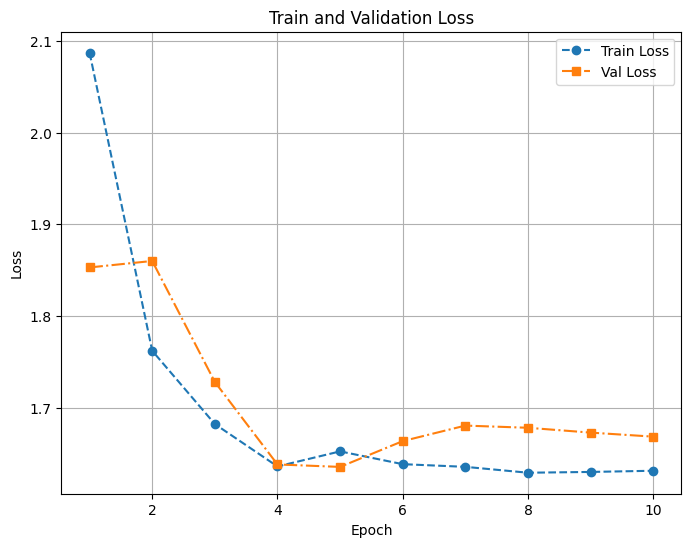

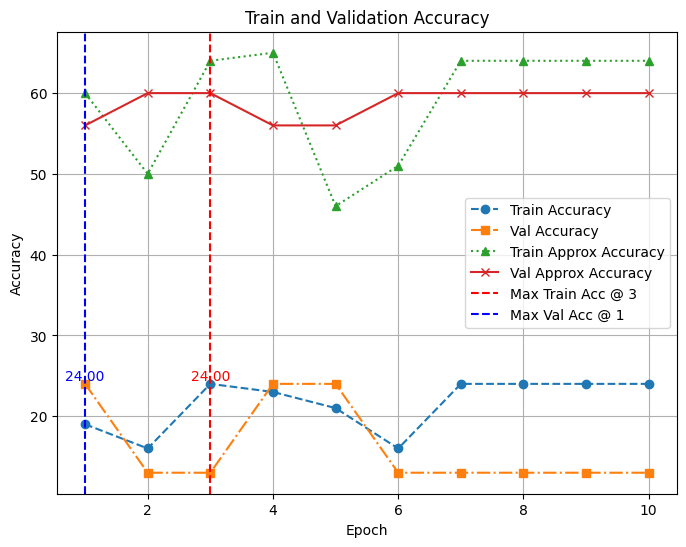

In [16]:
import utils.visualization as vis
vis.plot_loss_curve(log_data)
vis.plot_accuracy_curve(log_data)

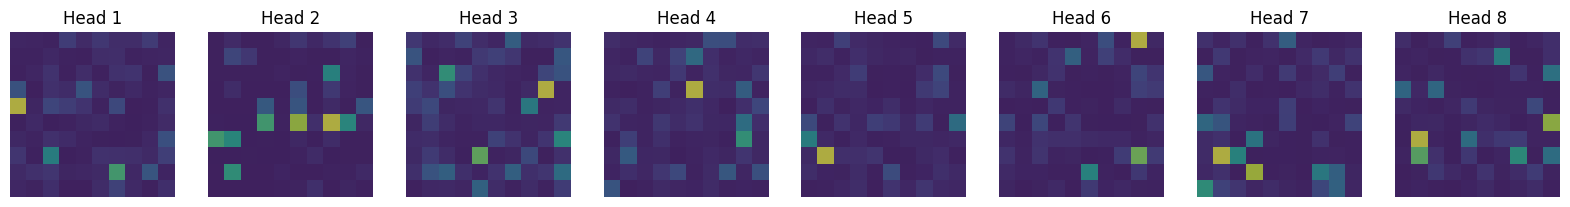

In [20]:
import torch
import matplotlib.pyplot as plt
from torchvision.transforms.functional import resize


image_path = "train/54.jpg"
from PIL import Image
image = Image.open(image_path)


attention_map = outputs.decoder_attentions[-1]  # get the attention weight from the model


model_helper.visualize_attention_map(image, attention_map)


In [ ]:
import torch
import pandas as pd
from torch.utils.data import DataLoader
from tqdm import tqdm

model.eval()

# initializing result list
predictions = []

with torch.no_grad():
    for inputs, _ in tqdm(test_loader, desc="Predicting"):
        inputs = inputs.to(device)

        # get preditcions
        outputs = model(inputs).squeeze()

        preds = outputs.cpu().numpy().tolist()

        rounded_preds = [int(round(p)) for p in preds]

        predictions.extend(rounded_preds)

result = pd.DataFrame({
    "id": test_dataset.dataframe.iloc[:, 0],  # 第一列文件名
    "stable_height": predictions  # 模型预测结果
})

print(result.head())

result.to_csv("predictions.csv", index=False)
